In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('src/output/distributed/log/pti_tpi3.txt', sep=";", header=None)
data.columns = ["image", "faces", "time"]

In [108]:
data.mean()

faces     177.78
time     8774.71
dtype: float64

In [3]:
for i in range(len(data["image"])):
    data["image"][i] = data["image"][i].split("_")[0]

/home/lucasemanuelbs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
data_c = pd.read_csv('src/output/centralized/log/pti_tpi.txt', sep=";", header=None)
data_c.columns = ["image", "faces", "time"]
for i in range(len(data_c["image"])):
    data_c["image"][i] = data_c["image"][i].split("_")[0]


/home/lucasemanuelbs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,image,faces,time
0,02,119,38838
1,05,99,6937
2,08,173,19839
3,11,268,3613
4,14,151,13984
5,17,132,1088
6,20,252,20141
7,23,134,3970
8,26,53,85525
9,29,211,13755


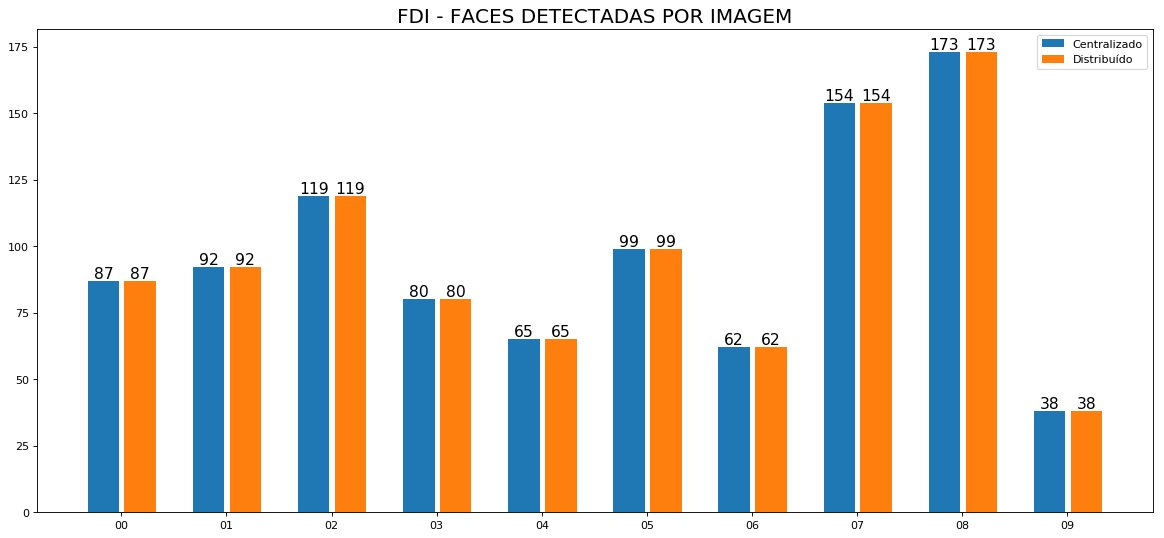

In [15]:
# Create bars
barWidth = 0.3
bars1 = data_c.sort_values("image")["faces"].head(10).values
bars2 = data.sort_values("image")["faces"].head(10).values

# The X position of bars
r1 = data_c.sort_values("image").reset_index().head(10).index -.35
r2 = data.sort_values("image").reset_index().head(10).index 
r3 = r1 + r2

# r1 = np.arange(len(bars1))
# r2 = [x + barWidth + 0.1 for x in r1]
# r3 = [x + barWidth for x in r2]


plt.figure(num=None, figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k')
# Create barplot
# plt.bar(r1, bars1 , width = barWidth, color = (0.3,0.5,0.4,0.6), label='Centralized')
# plt.bar(r2, bars2, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Distributed')

plt.bar(r1, bars1 , width = barWidth, label='Centralizado')
plt.bar(r2, bars2, width = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r - barWidth + .12 for r in range(len(r3))], data.sort_values("image")["image"])
 
for i in range(len(r3)):
    plt.text(x = r1[i] , y = bars1[i]+ 1, s = bars1[i], horizontalalignment='center', size = 14 )
    plt.text(x = r2[i] , y = bars2[i]+ 1, s = bars2[i], horizontalalignment='center', size = 14 )
    
# Create labels  
# Show graphic
plt.title("FDI - FACES DETECTADAS POR IMAGEM",fontsize=18)
plt.show()


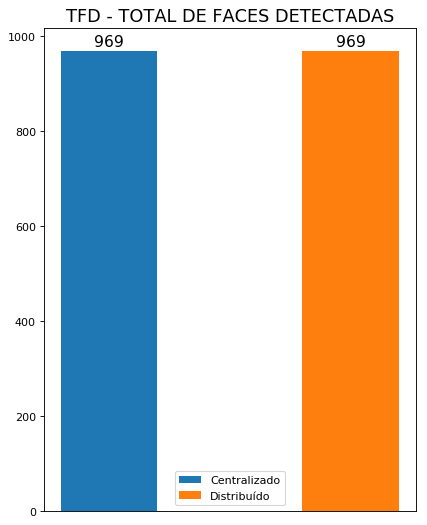

In [67]:
# Create bars
barWidth = 1
bars1 = data_c.sort_values("image")["faces"].head(10).values.sum()
bars2 = data.sort_values("image")["faces"].head(10).values.sum()

# The X position of bars
r1 = 1
r2 = r1 + barWidth + 1.5
r3 = r1 + r2

# r1 = np.arange(len(bars1))
# r2 = [x + barWidth + 0.1 for x in r1]
# r3 = [x + barWidth for x in r2]


plt.figure(num=None, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')
# Create barplot
# plt.bar(r1, bars1 , width = barWidth, color = (0.3,0.5,0.4,0.6), label='Centralized')
# plt.bar(r2, bars2, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Distributed')

plt.bar(r1, bars1 , width = barWidth, label='Centralizado')
plt.bar(r2, bars2, width = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
 
# for i in range(len(r3)):
#     plt.text(x = r1 , y = bars1+ 1, s = bars1, horizontalalignment='center', size = 20 )
plt.text(x = r1 , y = bars1 + 10, s = bars1, horizontalalignment='center', size = 14 )
plt.text(x = r2 , y = bars2 + 10, s = bars2, horizontalalignment='center', size = 14 )
    
# Create labels  
# Show graphic
plt.title("TFD - TOTAL DE FACES DETECTADAS",fontsize=16)
plt.show()


969

969

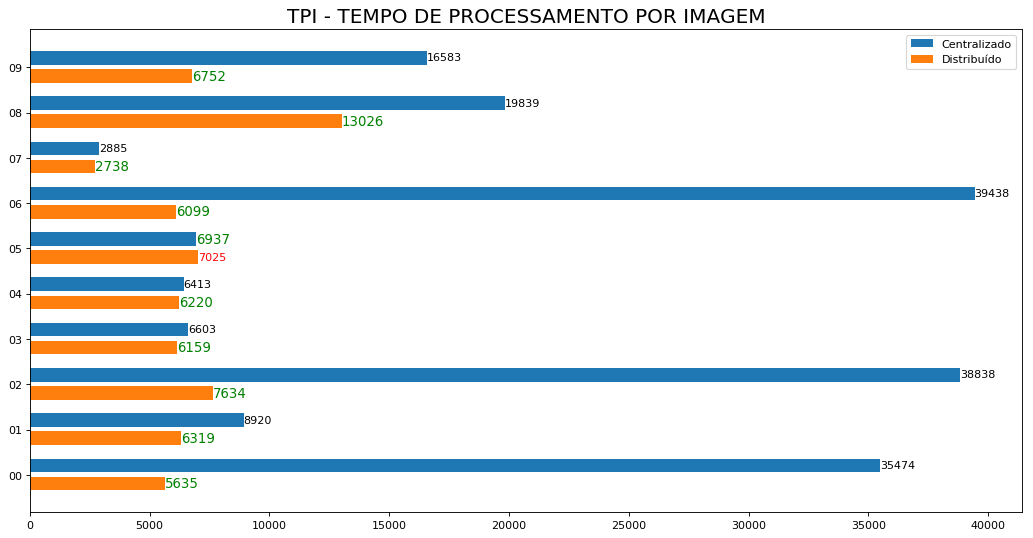

In [17]:
#  Create bars
barWidth = 0.3
bars1 = data.sort_values("image").reset_index().head(10).index 
bars2 = data_c.sort_values("image").reset_index().head(10).index -.4

# The X position of bars
r1 = data_c.sort_values("image")["time"].head(10).values
r2 = data.sort_values("image")["time"].head(10).values
r3 = r1 + r2

# r1 = np.arange(len(bars1))
# r2 = [x + barWidth + 0.1 for x in r1]
# r3 = [x + barWidth for x in r2]


plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
# Create barplot
# plt.bar(r1, bars1 , width = barWidth, color = (0.3,0.5,0.4,0.6), label='Centralized')
# plt.bar(r2, bars2, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Distributed')

plt.barh(bars1, r1, height = barWidth, label='Centralizado')
plt.barh(bars2, r2, height = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°


plt.yticks([r - barWidth + .09 for r in range(len(r3))], data.sort_values("image")["image"])
 
for i in range(len(r3)):
    if (r1[i] > r2[i]):
        color1 = 'black'
        color2 = 'green'
        size1 = 10
        size2 = 12
    else:
        color1 = 'green'
        color2 = 'red'
        size1 = 12
        size2 = 10
        
        
    plt.text(x = r1[i] , y = bars1[i], s = r1[i], size = size1, color=color1,
            horizontalalignment='left', verticalalignment='center')
    plt.text(x = r2[i] , y = bars2[i], s = r2[i], size = size2, color=color2,
            horizontalalignment='left', verticalalignment='center')
    
# Create labels  
# Show graphic
plt.title("TPI - TEMPO DE PROCESSAMENTO POR IMAGEM",fontsize=18)
plt.show()


In [85]:
data = pd.read_csv('src/output/distributed/log/tpt3.txt', sep=";", header=None)
data.columns = ["tpt"]
data.values.max()

236100

In [86]:
data_c = pd.read_csv('src/output/centralized/log/tpt.txt', sep=";", header=None)
data_c.columns = ["tpt"]
data_c.values.max()

1974178

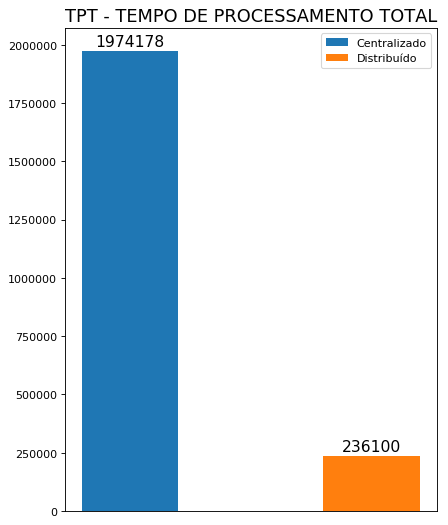

In [97]:
# Create bars
barWidth = 1
bars1 = data_c.values.max()
bars2 = data.values.max()

# The X position of bars
r1 = 1
r2 = r1 + barWidth + 1.5
r3 = r1 + r2

# r1 = np.arange(len(bars1))
# r2 = [x + barWidth + 0.1 for x in r1]
# r3 = [x + barWidth for x in r2]


plt.figure(num=None, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')
# Create barplot
# plt.bar(r1, bars1 , width = barWidth, color = (0.3,0.5,0.4,0.6), label='Centralized')
# plt.bar(r2, bars2, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Distributed')

plt.bar(r1, bars1 , width = barWidth, label='Centralizado')
plt.bar(r2, bars2, width = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
 
# for i in range(len(r3)):
#     plt.text(x = r1 , y = bars1+ 1, s = bars1, horizontalalignment='center', size = 20 )
plt.text(x = r1 , y = bars1 + 20000, s = bars1, horizontalalignment='center', size = 14 )
plt.text(x = r2 , y = bars2 + 20000, s = bars2, horizontalalignment='center', size = 14 )
    
# Create labels  
# Show graphic
plt.title("TPT - TEMPO DE PROCESSAMENTO TOTAL",fontsize=16)
plt.show()
